In [1]:
import requests
import lxml.html as lh
import pandas as pd
import numpy as np
from IPython.display import display, HTML
import matplotlib.pyplot as plt # required for data visualization purposes.
from BeautifulSoup import BeautifulSoup, SoupStrainer
from bs4 import BeautifulSoup

In [2]:
starting_url = 'https://archive.ics.uci.edu/ml/'
url='https://archive.ics.uci.edu/ml/datasets.html'
page = requests.get(url)
soup = BeautifulSoup(page.content, 'html.parser')
#print soup.prettify()

In [3]:
def scrape_url(url, index):
    response = requests.get(url)
    if (response.content == None):
        return [],[None] * 9
    soup = BeautifulSoup(response.content, "html.parser")
    header = soup.find("b", text="Number of Instances:")
    if (header == None):
        return [],[None] * 9
    table = header.find_parent("table")
    dictionary_to_df= {}
    first = 0 
    data = []
    data.append(index)
    columns = []
    columns.append('DataSet Name')
    for row in table.find_all("tr"):
        L= row.find_all("td")
        for cell in L[1::2]:
            data.append(cell.get_text(strip=True))
        for cell in L[0::2] :
            columns.append(cell.get_text(strip=True))
    return columns, data
    

In [4]:
columns, data = scrape_url('https://archive.ics.uci.edu/ml/datasets/Abalone', 'Abalone')
print columns
print data

['DataSet Name', u'Data Set Characteristics:', u'Number of Instances:', u'Area:', u'Attribute Characteristics:', u'Number of Attributes:', u'Date Donated', u'Associated Tasks:', u'Missing Values?', u'Number of Web Hits:']
['Abalone', u'Multivariate', u'4177', u'Life', u'Categorical, Integer, Real', u'8', u'1995-12-01', u'Classification', u'No', u'765931']


In [15]:
start_now = 0
list_of_data = []
for link in soup.findAll('a'):
    print link.get_text(strip=True)
    dataset_name = link.get_text(strip=True)
    if link.has_attr('href'):
        #print '======= has link  ======='
        if link.get_text(strip=True) == 'Abalone':
            columns, data = scrape_url(starting_url+link['href'], 'Abalone' ) 
            start_now = 1
        if start_now == 0 or link.get_text(strip=True) == '':            
            continue
        #print link.get_text(strip=True), link['href']
        #print '==============================================================='
        cols, data = scrape_url(starting_url+link['href'],dataset_name)
        #print columns,data
        if None in data:
            print dataset_name
        list_of_data.append(data)
        #print '==============================================================='

In [6]:
data = pd.DataFrame(list_of_data, columns=columns)
data.head(10)

,DataSet Name,Data Set Characteristics:,Number of Instances:,Area:,Attribute Characteristics:,Number of Attributes:,Date Donated,Associated Tasks:,Missing Values?,Number of Web Hits:


In [7]:
print data.info()
display(HTML(data.describe().to_html()))
print '\n'
print 'Number of NULL'
print '\n'
print data.isnull().sum()
print '\n\n'
print 'Number of UNIQUE'
print '\n'
print data.nunique()

<class 'pandas.core.frame.DataFrame'>
Index: 0 entries
Data columns (total 10 columns):
DataSet Name                  0 non-null object
Data Set Characteristics:     0 non-null object
Number of Instances:          0 non-null object
Area:                         0 non-null object
Attribute Characteristics:    0 non-null object
Number of Attributes:         0 non-null object
Date Donated                  0 non-null object
Associated Tasks:             0 non-null object
Missing Values?               0 non-null object
Number of Web Hits:           0 non-null object
dtypes: object(10)
memory usage: 0.0+ bytes
None


,DataSet Name,Data Set Characteristics:,Number of Instances:,Area:,Attribute Characteristics:,Number of Attributes:,Date Donated,Associated Tasks:,Missing Values?,Number of Web Hits:
count,0,0,0,0,0,0,0,0,0,0
unique,0,0,0,0,0,0,0,0,0,0




Number of NULL


DataSet Name                  0
Data Set Characteristics:     0
Number of Instances:          0
Area:                         0
Attribute Characteristics:    0
Number of Attributes:         0
Date Donated                  0
Associated Tasks:             0
Missing Values?               0
Number of Web Hits:           0
dtype: int64



Number of UNIQUE


Empty DataFrame
Columns: [DataSet Name, Data Set Characteristics:, Number of Instances:, Area:, Attribute Characteristics:, Number of Attributes:, Date Donated, Associated Tasks:, Missing Values?, Number of Web Hits:]
Index: []


In [8]:
data = data.replace('N/A', np.nan)
data['Date Donated'] = pd.to_datetime(data['Date Donated'])
for i in data.columns:
    if i in ['DataSet Name','Data Set Characteristics:','Area:','Attribute Characteristics:','Associated Tasks:','Missing Values?']:  
        data[i] = data[i].str.strip().astype('category')
    else:
        if(i== 'Date Donated'):
            continue
        data[i] = data[i].astype(float)

In [9]:
data.head(10)

,DataSet Name,Data Set Characteristics:,Number of Instances:,Area:,Attribute Characteristics:,Number of Attributes:,Date Donated,Associated Tasks:,Missing Values?,Number of Web Hits:


In [10]:
print data.info()
display(HTML(data.describe().to_html()))
print '\n'
print 'Number of NULL'
print '\n'
print data.isnull().sum()
print '\n\n'
print 'Number of UNIQUE'
print '\n'
print data.nunique()

<class 'pandas.core.frame.DataFrame'>
Index: 0 entries
Data columns (total 10 columns):
DataSet Name                  0 non-null category
Data Set Characteristics:     0 non-null category
Number of Instances:          0 non-null float64
Area:                         0 non-null category
Attribute Characteristics:    0 non-null category
Number of Attributes:         0 non-null float64
Date Donated                  0 non-null datetime64[ns]
Associated Tasks:             0 non-null category
Missing Values?               0 non-null category
Number of Web Hits:           0 non-null float64
dtypes: category(6), datetime64[ns](1), float64(3)
memory usage: 480.0+ bytes
None


,Number of Instances:,Number of Attributes:,Number of Web Hits:
count,0.0,0.0,0.0
mean,NaN,NaN,NaN
std,NaN,NaN,NaN
min,NaN,NaN,NaN
25%,NaN,NaN,NaN
50%,NaN,NaN,NaN
75%,NaN,NaN,NaN
max,NaN,NaN,NaN




Number of NULL


DataSet Name                  0
Data Set Characteristics:     0
Number of Instances:          0
Area:                         0
Attribute Characteristics:    0
Number of Attributes:         0
Date Donated                  0
Associated Tasks:             0
Missing Values?               0
Number of Web Hits:           0
dtype: int64



Number of UNIQUE


Empty DataFrame
Columns: [DataSet Name, Data Set Characteristics:, Number of Instances:, Area:, Attribute Characteristics:, Number of Attributes:, Date Donated, Associated Tasks:, Missing Values?, Number of Web Hits:]
Index: []


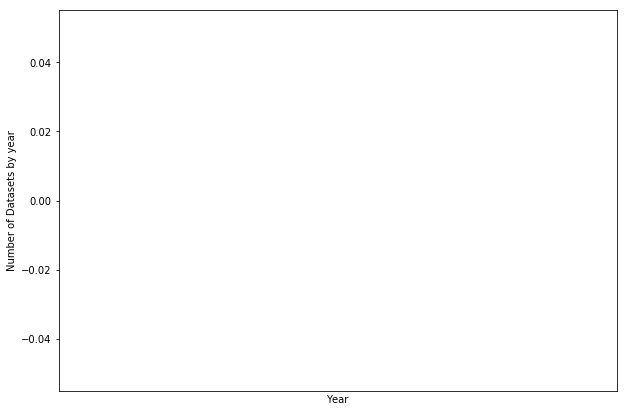

In [11]:
region =data['Area:'].value_counts().sort_index()
plt.figure(figsize=(10,7))
plt.bar(np.arange(len(region.index)),region.values)
plt.xticks(np.arange(len(region.index)), region.index)
plt.xticks(rotation=90)
plt.ylabel('Number of Datasets by year')
plt.xlabel('Year')
plt.show()

Series([], Name: Missing Values?, dtype: int64)


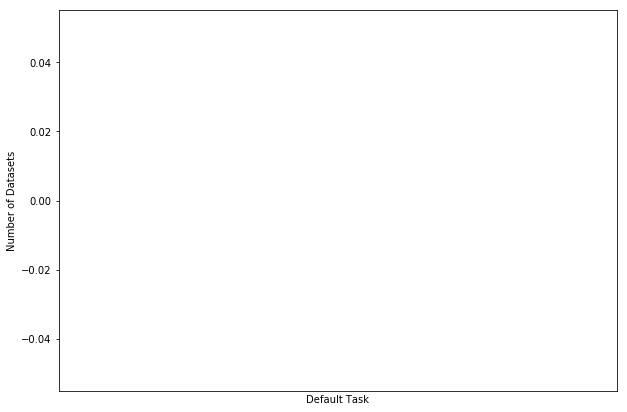

In [12]:
region =data['Missing Values?'].value_counts().sort_index()
print region
plt.figure(figsize=(10,7))
plt.bar(np.arange(len(region.index)),region.values)
plt.xticks(np.arange(len(region.index)), region.index)
plt.xticks(rotation=90)
plt.ylabel('Number of Datasets')
plt.xlabel('Default Task')
plt.show()

In [13]:
region =data['Attribute Types'].value_counts().sort_index()
print region
plt.figure(figsize=(10,7))
plt.bar(np.arange(len(region.index)),region.values)
plt.xticks(np.arange(len(region.index)), region.index)
plt.xticks(rotation=90)
plt.ylabel('Number of Datasets')
plt.xlabel('Categories')
plt.show()

KeyError: 'Attribute Types'

In [ ]:
region =data['Attribute Characteristics:'].value_counts().sort_index()
plt.figure(figsize=(10,7))
plt.bar(np.arange(len(region.index)),region.values)
plt.xticks(np.arange(len(region.index)), region.index)
plt.xticks(rotation=90)
plt.ylabel('Number of Datasets')
plt.xlabel('DataTypes')
plt.show()